# Practica 4 - Análisis de series de tiempo, Filtro de media móvil y Filtro de primera diferencia

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 11/09/2024


## Análisis de series de tiempo

### 1. La señal corresponde a datos de la tasa de cambio representativa del mercado (TRM), la cual mide la cantidad de pesos colombianos por un dólar de los Estados Unidos. El archivo historical TRM.csv contiene 6 columnas con la siguiente información:
- Fecha
- Precio
- Apertura
- Máximo
- Mínimo
- Cambio

In [61]:
import pandas as pd
import numpy as np

# Función para extraer y limpiar el valor de la moneda
def extract_currency(x):
    if isinstance(x, str):
        return x.replace('%', '').replace(',', '')
    return x

# Cargar el archivo CSV
df = pd.read_csv('historical_TRM.csv', delimiter=',')

# Analizar las primeras filas del DataFrame para verificar el contenido
print(df.head())

# Limpiar y convertir la columna 'Precio' a tipo float
df['Precio'] = df['Precio'].apply(extract_currency).astype('float')

# Convertir la columna 'Fecha' a tipo datetime y ordenar el DataFrame por 'Fecha' (mm/dd/yyyy)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%Y')
df = df.sort_values('Fecha', ascending=True)

# Verificar las primeras filas después de la conversión y organización
print(df.head())


        Fecha    Precio  Apertura    Maximo    Minimo  Cambio
0  01/01/2023  4,859.00  4,848.00  5,008.88  4,818.11   0.25%
1  12/25/2022  4,847.00  4,729.00  4,851.90  4,727.21   2.51%
2  12/18/2022  4,728.33  4,790.26  4,790.63  4,727.79  -1.19%
3  12/11/2022  4,785.51  4,809.85  4,861.00  4,757.65  -0.43%
4  12/04/2022  4,806.00  4,771.54  4,843.88  4,765.20   0.78%
         Fecha   Precio  Apertura    Maximo    Minimo  Cambio
521 2013-01-06  1763.40  1,771.73  1,774.00  1,758.50  -0.45%
520 2013-01-13  1769.50  1,763.00  1,778.70  1,756.11   0.35%
519 2013-01-20  1779.12  1,769.28  1,782.97  1,768.17   0.54%
518 2013-01-27  1776.20  1,778.90  1,782.05  1,764.65  -0.16%
517 2013-02-03  1786.34  1,777.11  1,799.46  1,777.06   0.57%


### 2. Utilice la columna Fecha y calcule el periodo de muestreo para esta serie de tiempo. Expréselo en días, semanas y años.

In [62]:
### 2. Utilice la columna Fecha y calcule el periodo de muestreo para esta serie de tiempo. Expréselo en días, semanas y años.

#Calcular el periodo de muestreo
periodo = df['Fecha'].diff().mean()
print('Periodo de muestreo: ', periodo)



Periodo de muestreo:  7 days 00:00:00


### 3. Grafique la señaal Precio en función del tiempo y presente un análisis sobre la misma.

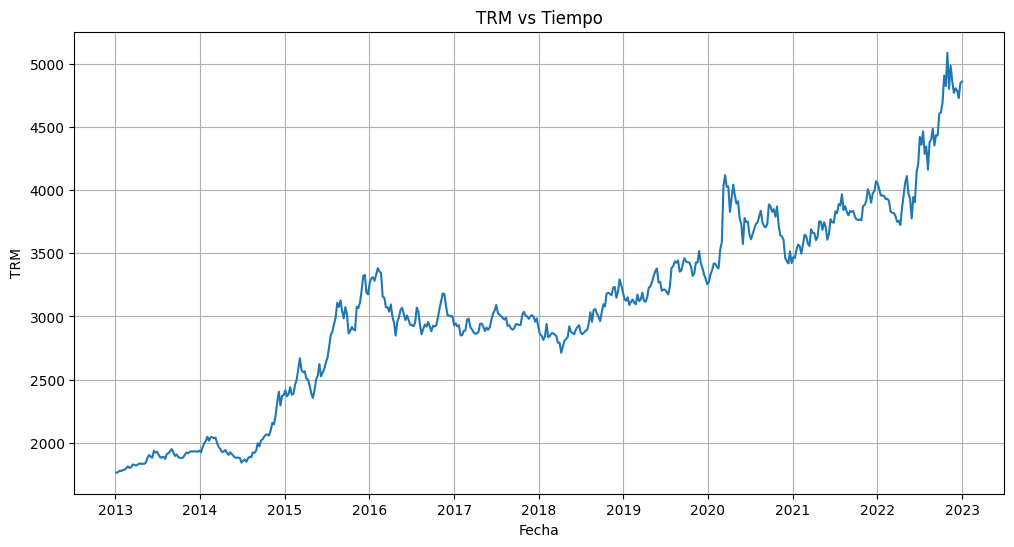

In [63]:
### 3. Grafique la señaal Precio en función del tiempo y presente un análisis sobre la misma.

import matplotlib.pyplot as plt

# Graficar la señal 'Precio' en función del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Precio'])
plt.title('TRM vs Tiempo')
plt.xlabel('Fecha')
plt.ylabel('TRM')
plt.grid()
plt.show()


La grafica muestra la evolución del precio del dólar en Colombia a lo largo del tiempo. Se observa que el precio ha tenido variaciones a lo largo de los años, con periodos de alza y baja. En general, se puede apreciar una tendencia alcista en el precio del dólar en Colombia, lo cual puede estar influenciado por factores económicos y políticos tanto a nivel nacional como internacional.

### 4. Grafique la señal Cambio en función del tiempo y presente un análisis sobre la misma.

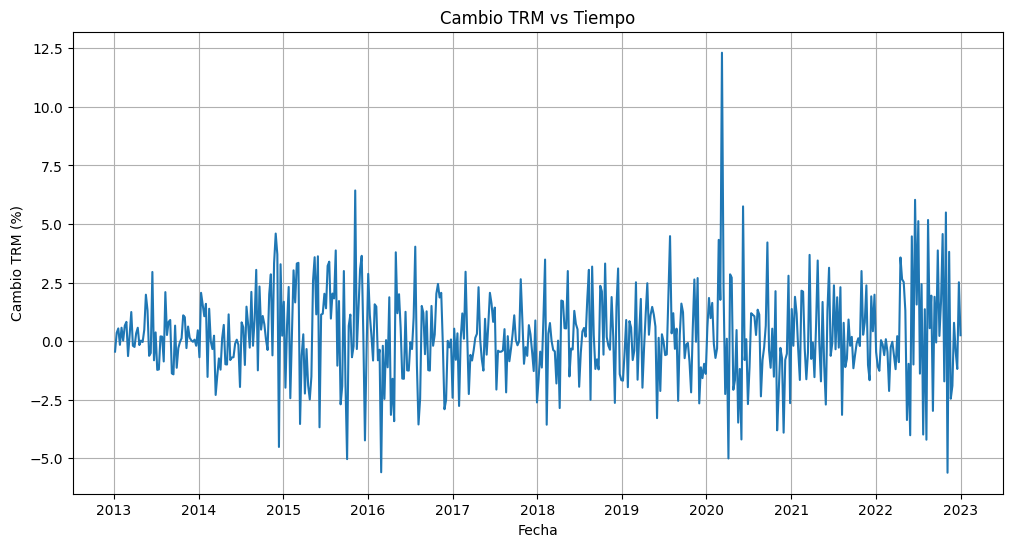

In [64]:
### 4. Grafique la señal Cambio en función del tiempo y presente un análisis sobre la misma.

# Calcular la variación del precio
df['Cambio'] = df['Cambio'].apply(extract_currency).astype('float')

# Graficar la señal 'Cambio' en función del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Cambio'])
plt.title('Cambio TRM vs Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cambio TRM (%)')
plt.grid()
plt.show()


La gráfica de cambio de la TRM muestra que la variación del precio de la TRM ha sido muy volátil en los últimos años, con cambios bruscos en periodos cortos de tiempo (2020). Esto puede deberse a factores económicos, políticos y sociales que afectan la economía del país y la tasa de cambio.

### 5. Realice un histograma de la señal Precio, y analice el resultado de la gráfica. ¿Qué puede concluir del resultado?

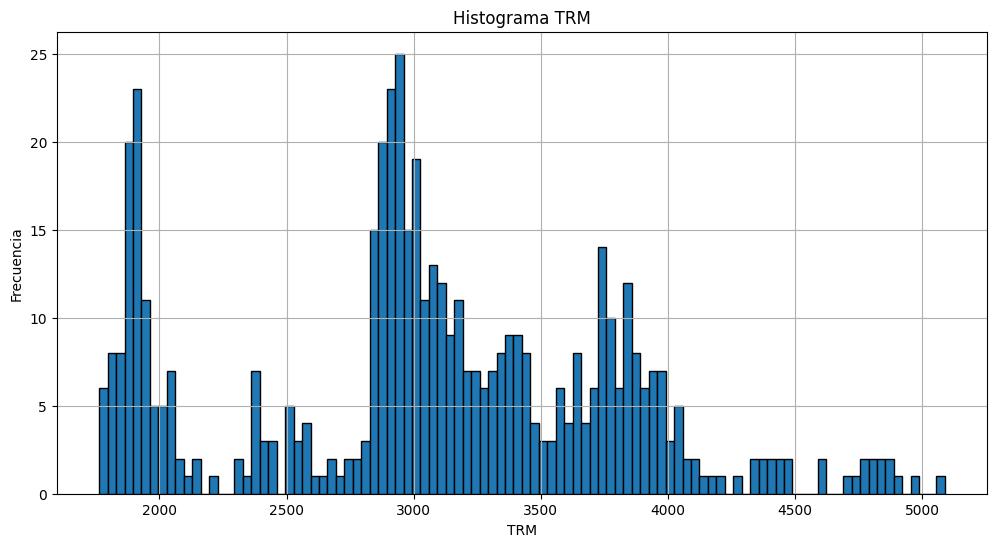

In [65]:
### 5. Realice un histograma de la señal Precio, y analice el resultado de la gráfica. ¿Qué puede concluir del resultado?

# Graficar el histograma de la señal 'Precio'
plt.figure(figsize=(12, 6))
plt.hist(df['Precio'], bins=100, edgecolor='black') # 100 bins (intervalos)
plt.title('Histograma TRM')
plt.xlabel('TRM')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()


En la gráfica de frecuencia de precios se puede observar que los precios más frecuentes (Estables) en el tiempo han sido cerca a 1800, 2900 y 3500. Siendo 2900 el precio más frecuente.

## Filtro de media móvil

### 1. Diseñe un filtro de media móvil con 3 diferentes valores de L en el rango de 5 a 70, calcule la respuesta de la señal ante dicho filtro y grafique la se˜nal resultante usando subplots (se puede utilizar el vector de tiempo generado anteriormente). ¿Con cual considera que se visualiza y se podría analizar mejor la información? Tip: Para calcular la salida se usa la convolución:

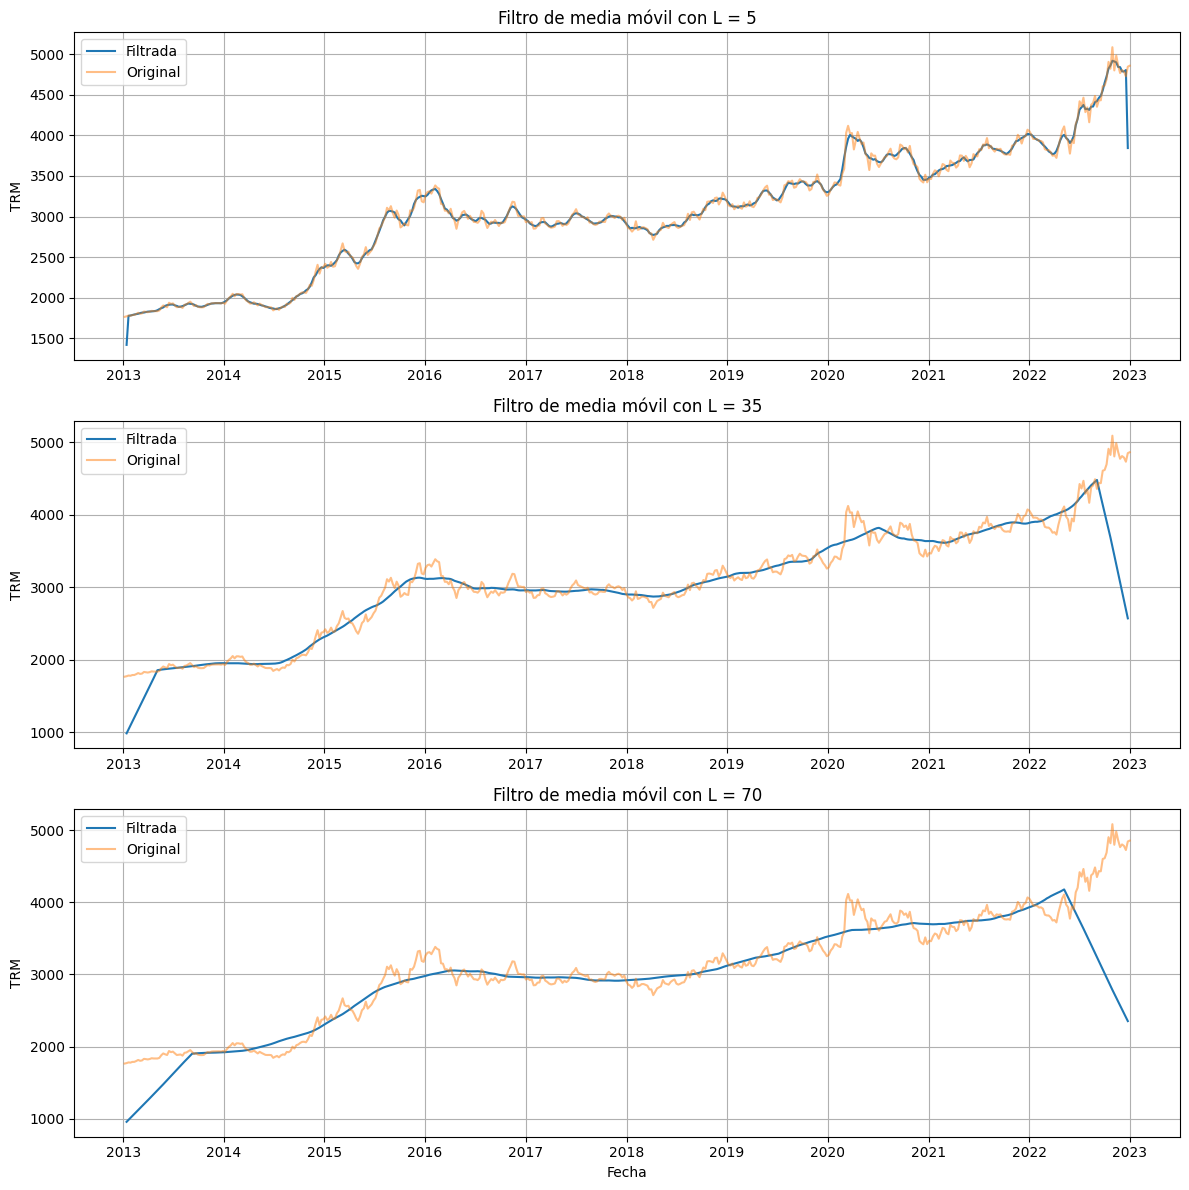

In [87]:
### 1. Diseñe un filtro de media móvil con 3 diferentes valores de L en el rango de 5 a 70, calcule la respuesta de la señal ante dicho filtro y grafique la se˜nal resultante usando subplots (se puede utilizar el vector de tiempo generado anteriormente). ¿Con cual considera que se visualiza y se podría analizar mejor la información? Tip: Para calcular la salida se usa la convolución:

# Crear un vector de tiempo
t = np.arange(0, len(df['Fecha']))

# Crear un filtro de media móvil
def moving_average(x, L):
    return np.convolve(x, np.ones(L)/float(L), mode='same') # 'same' para mantener el tamaño del vector

# Vector valores de L
L_values = [5, 35, 70]

# Crear un subplot con 3 gráficas de la señal 'Precio' filtrada con diferentes valores de L
plt.figure(figsize=(12, 12))

for i, L in enumerate(L_values):
    plt.subplot(3, 1, i+1)
    plt.plot(df['Fecha'][1:-1], moving_average(df['Precio'], L)[1:-1])
    plt.plot(df['Fecha'], df['Precio'], alpha=0.5)
    plt.title('Filtro de media móvil con L = {}'.format(L))
    plt.legend(['Filtrada', 'Original'])
    plt.ylabel('TRM')
    plt.grid()

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()


Conclusión: Con L = 5 se puede visualizar mejor la información, ya que se suaiza la señal sin perder la información relevante. Con L = 70 se pierde la información de la señal original. A partir de L = 35 se evidencia al final un cambio brusco con lo cual lleva a una perdida grande información.

El L es el tamaño de la ventana de tiempo que se toma para calcular el promedio móvil, por lo que un L más grande suaviza más la señal, pero también puede perder información importante

### 2. Importe las funciones del archivo ztrans.py incluido con esta guía (asegúrese de ubicarlo en la misma carpeta del Notebook), las cuales calculan la respuesta en frecuencia y fase, respuesta al escalón, y al impulso.

In [67]:
### 2. Importe las funciones del archivo ztrans.py incluido con esta guía (asegúrese de ubicarlo en la misma carpeta del Notebook), las cuales calculan la respuesta en frecuencia y fase, respuesta al escalón, y al impulso.

from ztrans import *

### 3. Utilice la función impz para graficar y analizar la respuesta al impulso y al escalón del filtro de media móvil. ¿Qué me indica la respuesta al impulso? Compare los resultados con L = 6 y L = 25. Tip: para usarla utilice el siguiente comando:

impz(num,den)

Coeficientes para L=6:  [ 0.16666667  0.          0.          0.          0.         -0.16666667] [ 1. -1.  0.  0.  0.  0.]
Coeficientes para L=25:  [ 0.04  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 -0.04] [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


'Respuesta al impulso para L = 6'

<Figure size 1200x600 with 0 Axes>

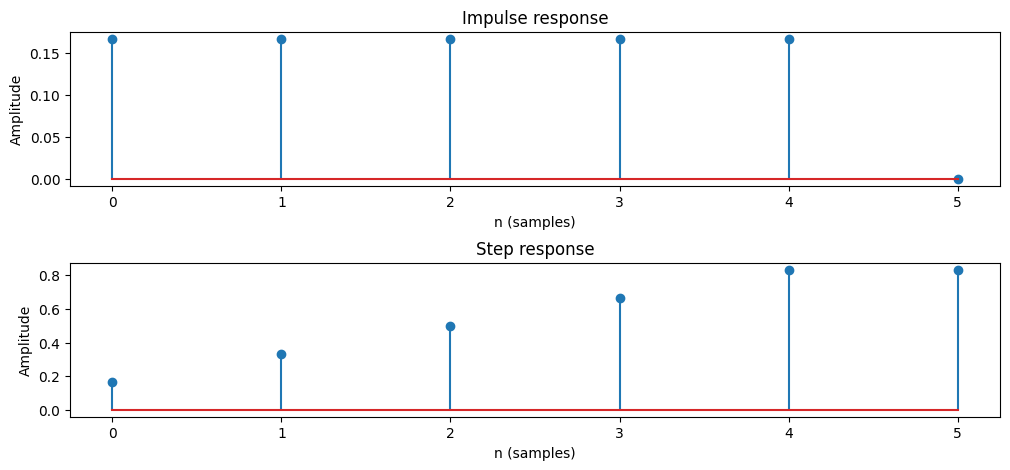

'Respuesta al impulso para L = 25'

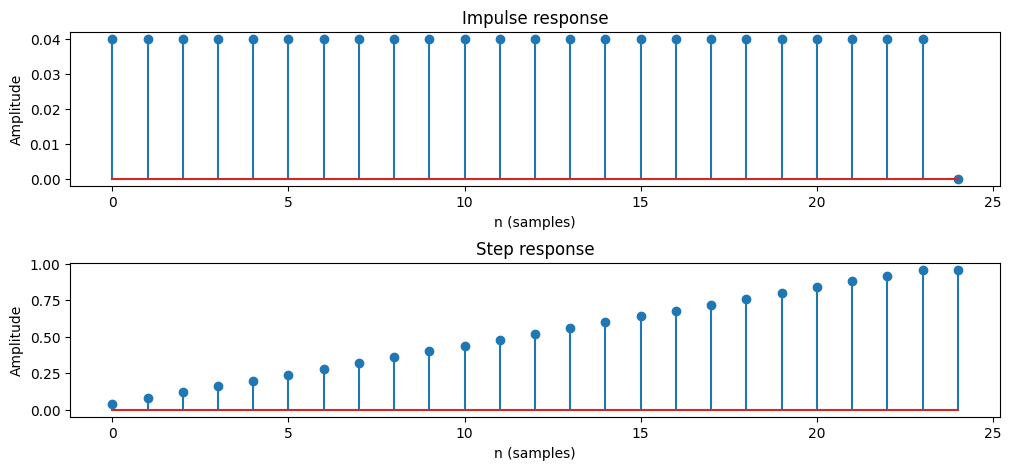

In [68]:
### 3. Utilice la función impz para graficar y analizar la respuesta al impulso y al escalón del filtro de media móvil. ¿Qué me indica la respuesta al impulso? Compare los resultados con L = 6 y L = 25. Tip: para usarla utilice el siguiente comando: impz(num,den)

# Vector de valores de L
L_values = [6, 25]
# Filtro de media móvil con L 
num = []
den = []
for i in range(len(L_values)):
    num.append(np.zeros(L_values[i]))
    num[i][0] = 1.0/L_values[i]
    num[i][-1] = -1.0/L_values[i]
    den.append(np.zeros(L_values[i]))
    den[i][0] = 1.0
    den[i][1] = -1.0

# Impriimir matriz de coeficientes
print('Coeficientes para L=6: ', num[0], den[0])
print('Coeficientes para L=25: ', num[1], den[1])

# Graficar la respuesta al impulso y al escalón
plt.figure(figsize=(12, 6))

for i in range(len(L_values)):
    display('Respuesta al impulso para L = {}'.format(L_values[i]))
    impz(num[i], den[i])

Las graficas de la respuesta al impulso para L=6 y L=25 muestran que el filtro de media movil es un filtro FIR, ya que la respuesta al impulso es finita y de duración finita. La respuesta al impulso para L=6 es más corta que para L=25, lo que indica que el filtro con L=6 es más rápido que el filtro con L=25.

### 4. Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de media móvil. ¿Qué tipo de filtro es? ¿Cómo es su respuesta en fase? Compare los resultados con L = 6 y L = 25. Tip: para usarla utilice el siguiente comando:

'Respuesta en frecuencia para L = 6'

C:\Users\Crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


<Figure size 1200x600 with 0 Axes>

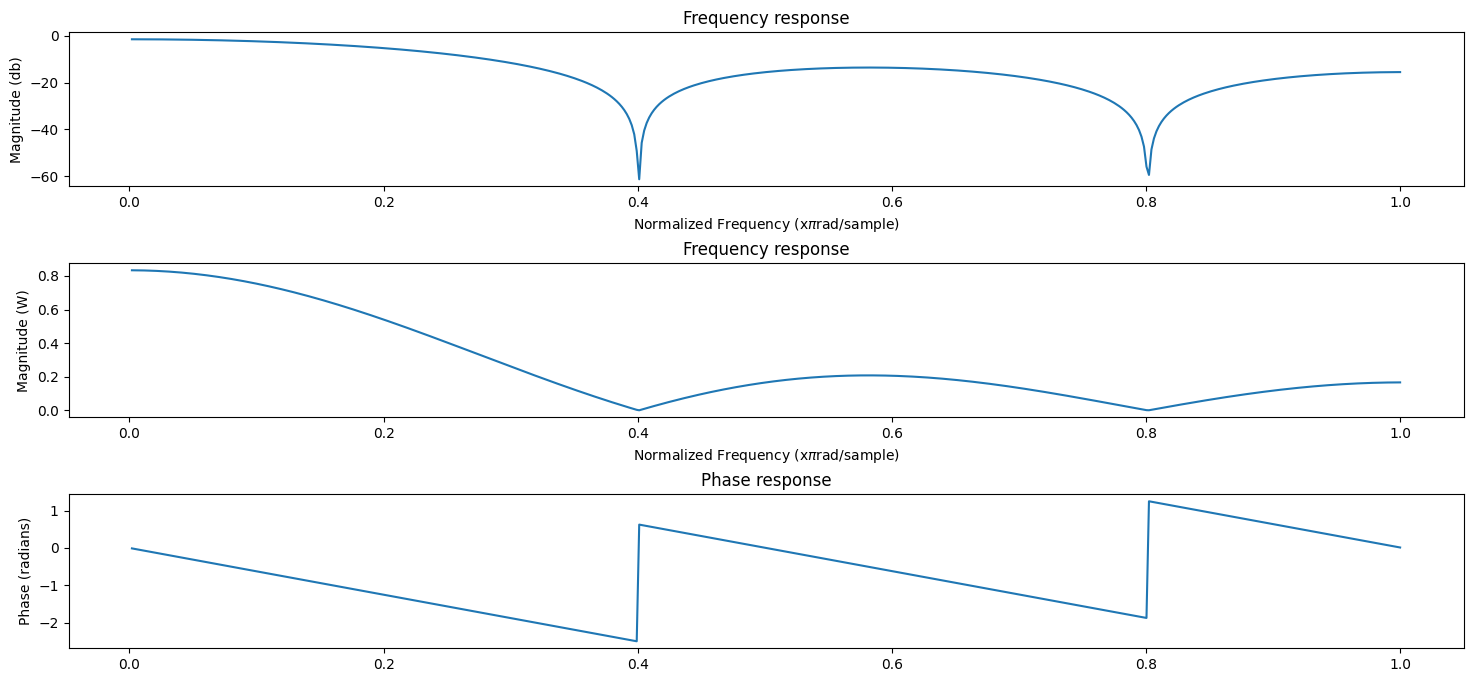

'Respuesta en frecuencia para L = 25'

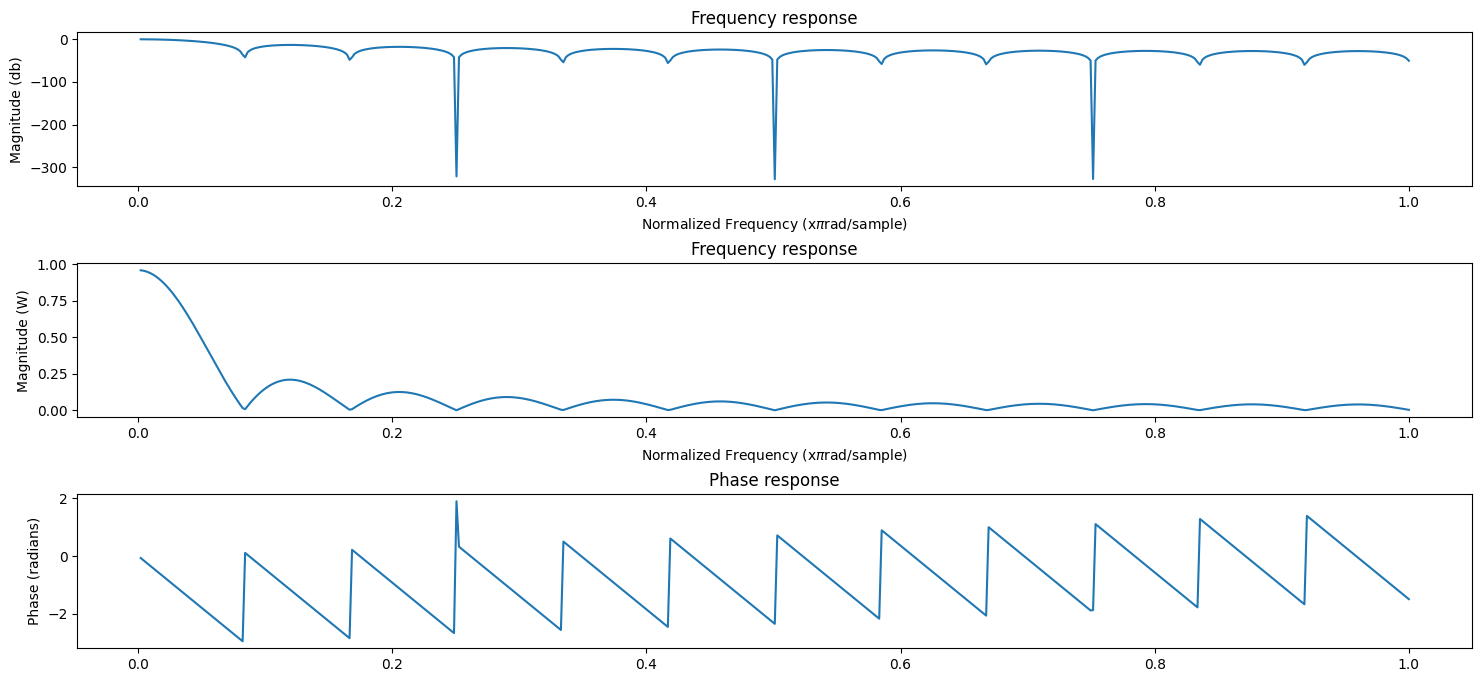

In [69]:
### 4. Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de media móvil. ¿Qué tipo de filtro es? ¿Cómo es su respuesta en fase? Compare los resultados con L = 6 y L = 25. Tip: para usarla utilice el siguiente comando: mfreqz(num,den)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))
for i in range(len(L_values)):
    display('Respuesta en frecuencia para L = {}'.format(L_values[i]))
    mfreqz(num[i], den[i])

Las graficas muestran que el filtro de media movil es un filtro de paso bajo, ya que atenua las frecuencias altas y deja pasar las bajas. La respuesta en fase es lineal y no presenta distorsiones.

La frecuencia de corte para L=6 es mayor que para L=25, por cual al aumentar el valor de L, se obtiene un filtro pasa bajos con una frecuencia de corte menor. La respuesta en fase es lineal y negativa, lo cual indica que el filtro introduce un retardo en la señal de salida.

## Filtro de primera diferencia

### 1. Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro de primera diferencia, grafique y analice brevemente la señal resultante. ¿Qué me indica esta señal?

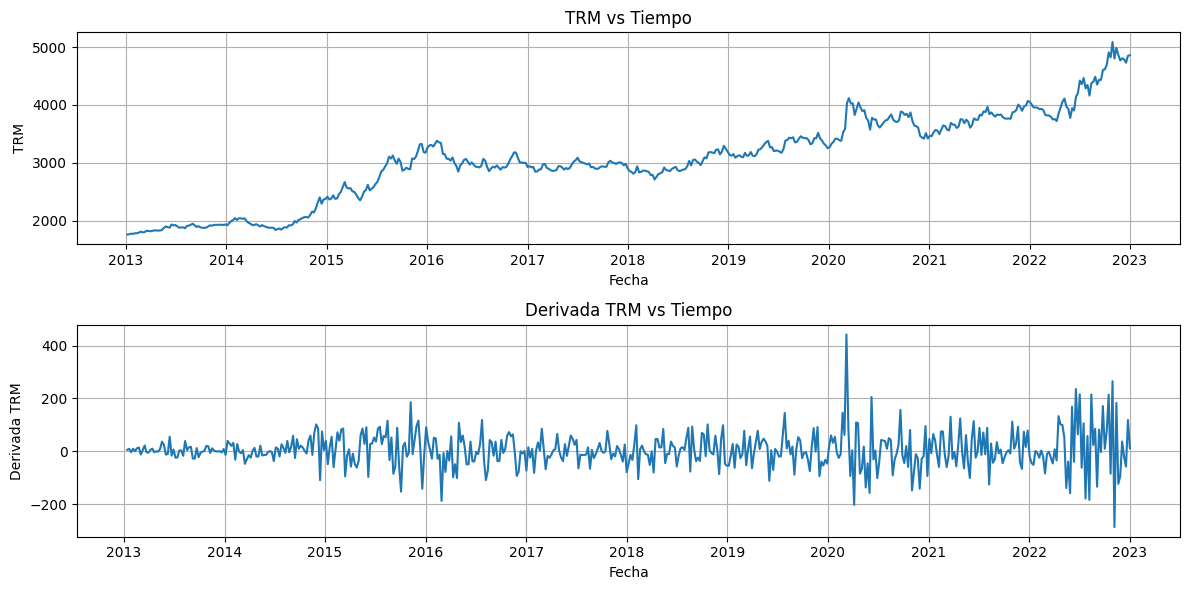

In [70]:
### 1. Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro de primera diferencia, grafique y analice brevemente la se˜nal resultante. ¿Qué me indica esta señal?

# Coeficientes para el filtro de primera diferencia
diff_coef = [1, -1]
# Crear un filtro de primera diferencia
num = [1, -1]
den = [1, 0]

# Calcular la derivada de la señal 'Precio'
df['Derivada'] = np.convolve(df['Precio'], diff_coef, mode='same')

# Graficar la señal 'Derivada' en función del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Fecha'], df['Precio'])
plt.title('TRM vs Tiempo')
plt.xlabel('Fecha')
plt.ylabel('TRM')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df['Fecha'][1:], df['Derivada'][1:])
plt.title('Derivada TRM vs Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Derivada TRM')
plt.grid()
plt.tight_layout()
plt.show()

La señal de la derivada nos indica la tasa de cambio de la TRM en el tiempo, es decir, la velocidad a la que cambia el precio de la moneda. De 2013 a mediados de 2014 el precio tenia una tendencia de estabilidad, pero a partir de 2015 se observa un aumento en la volatilidad de la TRM. A principios del 2020 se observa el mayor cambio en la TRM, lo cual puede estar relacionado con eventos económicos o políticos que afectaron el precio de la moneda. Y en los ultimo presenta una gran inestabilidad en el precio de la moneda.

### 2. Utilice la función impz para graficar y analizar la respuesta al impulso y al escalón del filtro de primera diferencia. ¿Qué me indica la respuesta al impulso?

'Respuesta al impulso'

<Figure size 1200x600 with 0 Axes>

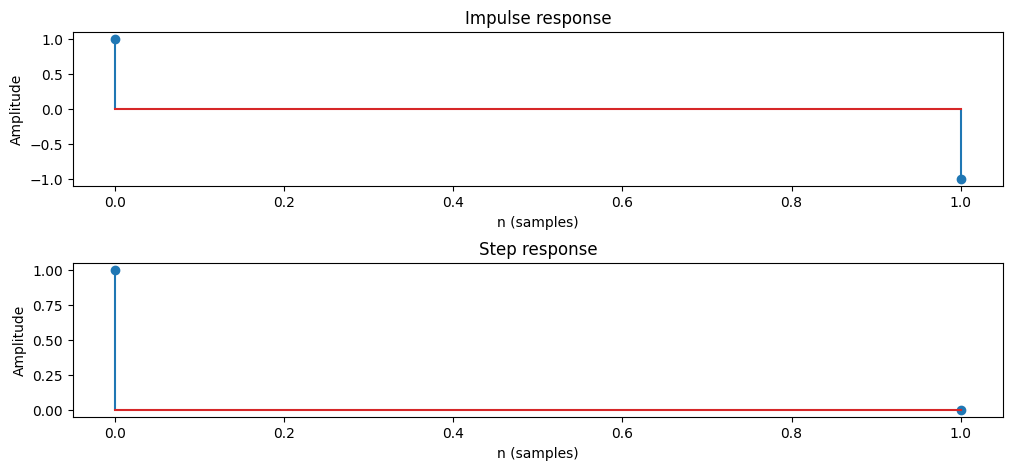

In [71]:
### 2. Utilice la función impz para graficar y analizar la respuesta al impulso y al escalón del filtro de primera diferencia. ¿Qué me indica la respuesta al impulso?


# Graficar la respuesta al impulso y al escalón
plt.figure(figsize=(12, 6))
display('Respuesta al impulso')
impz(num, den)


El filtro de primera diferencia es un filtro FIR (Finite Impulse Response) que se utiliza para calcular la derivada de una señal. La respuesta al impulso del filtro de primera diferencia es un impulso unitario seguido de un impulso negativo de igual magnitud. Esto indica que el filtro de primera diferencia es un filtro de paso alto que resalta las discontinuidades en la señal original.

### 4. Utilice la funcién mfreqz para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia. ¿Qué tipo de filtro es? ¿Cómo es la respuesta de fase?

c:\Users\Crist\OneDrive - Universidad de Antioquia\2024-2\PROCESAMIENTO DIGITAL DE SEÑALES\Laboratorio\Digital_Signal_Processing\P4\ztrans.py:9: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * log10 (abs(h))


<Figure size 1200x600 with 0 Axes>

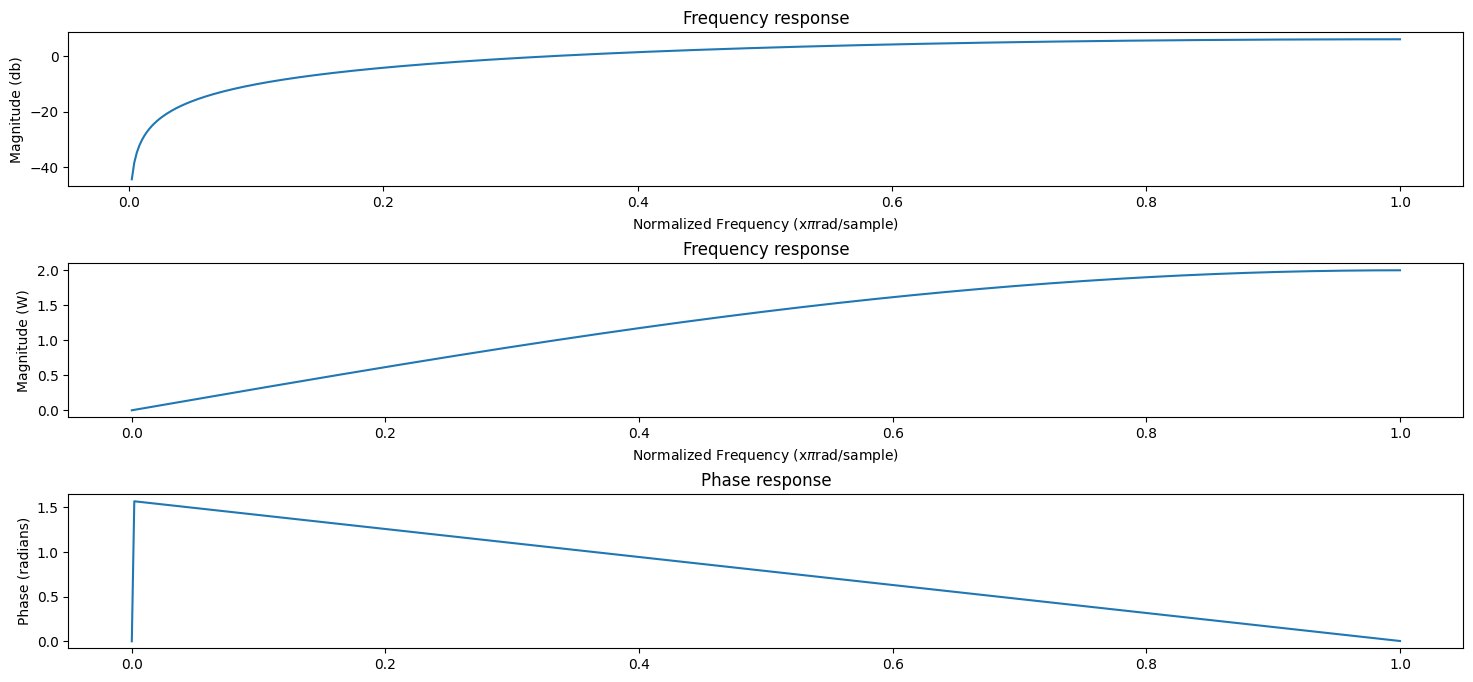

In [72]:
### 4. Utilice la funcién mfreqz para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia. ¿Qué tipo de filtro es? ¿Cómo es la respuesta de fase?

# Graficar la respuesta en frecuencia
plt.figure(figsize=(12, 6))
mfreqz(num, den)


El filtro de primera diferencia es un filtro pasa-altas, ya que atenúa las frecuencias bajas y deja pasar las frecuencias altas. La respuesta en fase es lineal, lo que indica que no hay distorsión en la fase de la señal de entrada.

## Conclusiones.

Análisis de Series de Tiempo:

El comportamiento del precio del dólar en Colombia ha sido volátil a lo largo del tiempo, mostrando una tendencia alcista general. Factores económicos, políticos y sociales han influido en esta variabilidad. El análisis de series de tiempo permite observar que la tasa representativa del mercado (TRM) ha tenido fluctuaciones significativas, particularmente en periodos de crisis económica y cambios políticos.

El análisis de series de tiempo se utiliza para estudiar la evolución de una variable en función del tiempo. En este contexto, permite identificar patrones, tendencias y estacionalidades en los datos.

Filtro de Media Móvil:

El filtro de media móvil es un filtro FIR (Finite Impulse Response) que suaviza las series de tiempo reduciendo la variabilidad aleatoria, ayudando a identificar la tendencia subyacente. Al promediar los valores en ventanas de tiempo (L), el filtro atenúa las fluctuaciones rápidas (frecuencias altas) y deja pasar los cambios lentos (frecuencias bajas).

Al aplicar el filtro de media móvil con diferentes tamaños de ventana (L), se observa que un tamaño pequeño (L=5) permite suavizar la señal sin perder información relevante, mientras que un tamaño grande (L=70) elimina detalles importantes de la serie original.
A partir de un L=35 se pierden detalles significativos, lo que puede llevar a una interpretación inexacta de las fluctuaciones del precio del dólar.

El filtro de media móvil actúa como un filtro de paso bajo, dejando pasar las frecuencias bajas y atenuando las altas, lo que ayuda a eliminar el ruido en la serie de tiempo. Sin embargo, introduce un retardo en la señal.
En resumen, este filtro es útil para observar tendencias generales y eliminar pequeñas fluctuaciones, pero su uso debe ser cuidadoso para no perder información clave sobre variaciones abruptas del precio.

Filtro de Primera Diferencia:

El filtro de primera diferencia es otro tipo de filtro FIR que se emplea para calcular la derivada de una señal discreta. Este filtro calcula la diferencia entre valores consecutivos de la serie, lo que permite obtener la tasa de cambio de la señal original.

Este filtro resalta las tasas de cambio del precio del dólar, permitiendo observar la velocidad con la que varía. A partir de 2015, se nota un aumento en la volatilidad del dólar, con el pico más significativo en 2020, reflejando los impactos de factores externos.
El filtro de primera diferencia actúa como un filtro de paso alto, resaltando las discontinuidades en la señal original y mostrando con claridad los cambios rápidos en la TRM.

En general, es útil para detectar eventos que producen variaciones significativas y abruptas en el precio del dólar, siendo ideal para identificar puntos de inflexión o choques económicos.